# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [1]:
# Imports
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [2]:
# Example file location
filename1 = 'data_pendulum_example/andrew.dat'
filename2 = 'data_pendulum_example/nicolai.dat'
filename3 = 'data_pendulum_example/andreas.dat'
filename4 = 'data_pendulum_example/Frederik.dat'

## Data reader

In [3]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

[(0, 72.55879999999999), (0, 26.0)]

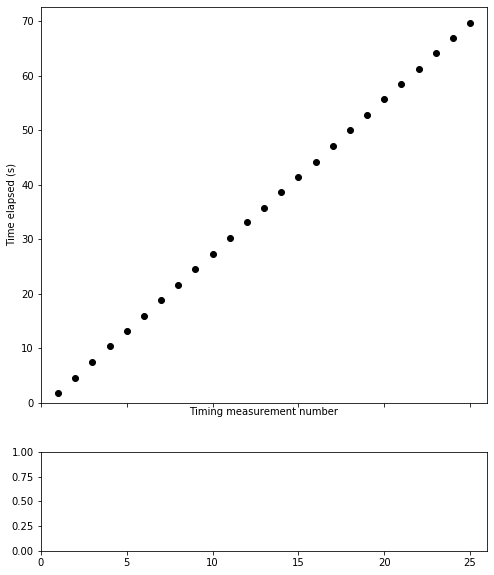

In [4]:
data_example = read_data(filename1)
n, t = data_example['n'], data_example['t_s']

# Plotting
sig_t = 0.1     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10),
                       gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
# ax[0].plot(n_plot, t_plot3)
ax[0].set_xlabel('Timing measurement number')
ax[0].set_ylabel('Time elapsed (s)')
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))


In [5]:
data_1 = read_data(filename1)
data_2 = read_data(filename2)
data_3 = read_data(filename3)
data_4 = read_data(filename4)
n1, t1 = data_1['n'], data_1['t_s']
n2, t2 = data_2['n'], data_2['t_s']
n3, t3 = data_3['n'], data_3['t_s']
n4, t4 = data_4['n'], data_4['t_s']
print(t1, t2, t3, t4)

[ 1.744   4.5889  7.5071 10.3818 13.0727 15.8966 18.7555 21.6349 24.4409
 27.2204 30.1299 33.0812 35.6996 38.6498 41.3924 44.2007 47.1471 49.9611
 52.7656 55.6346 58.4549 61.233  64.1271 66.9757 69.7139] [ 1.6408  4.3528  7.2369 10.0657 12.8038 15.6668 18.5104 21.4455 24.2308
 27.0537 29.8839 32.5891 35.4599 38.3468 41.1878 43.935  46.772  49.65
 52.4323 55.2334 58.1298 60.9092 63.7286 66.5637 69.4071] [ 5.1696  7.9872 10.8217 13.6636 16.4987 19.2963 22.0664 25.0058 27.7624
 30.6009 33.4475 36.3434 39.1703 41.9652 44.7799 47.6381 50.5076 53.2982
 56.0511 58.933  61.8159 64.606  67.4224 70.2335 73.1734] [ 4.9024  7.7098 10.4847 13.245  16.1078 18.9591 21.7447 24.5674 27.3976
 30.2856 33.0443 35.8769 38.8939 41.5541 44.3671 47.2606 50.0725 52.9115
 55.7127 58.5593 61.4168 64.1913 66.9793 69.8248 72.6905]


Text(0.5, 1.0, 'Experiment 4')

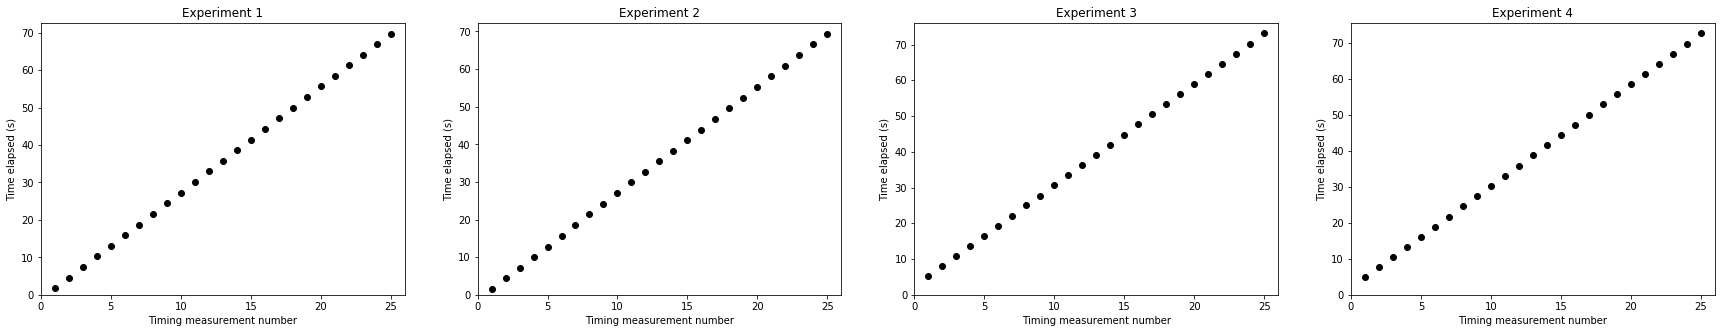

In [6]:
# Plotting raw data
sig_t = 0.05     # Set your own values...
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 5), sharex=True)
ax[0].errorbar(n1, t1, yerr=sig_t, color='k', fmt='o')
ax[0].set_xlabel('Timing measurement number')
ax[0].set_ylabel('Time elapsed (s)')
ax[0].set(xlim=(0, n1[-1]+np.ediff1d(n)[0]), ylim=(0, t1[-1]+np.ediff1d(t)[0]))
ax[0].set_title('Experiment 1')
ax[1].errorbar(n2, t2, yerr=sig_t, color='k', fmt='o')
ax[1].set_xlabel('Timing measurement number')
ax[1].set_ylabel('Time elapsed (s)')
ax[1].set(xlim=(0, n2[-1]+np.ediff1d(n)[0]), ylim=(0, t2[-1]+np.ediff1d(t)[0]))
ax[1].set_title('Experiment 2')
ax[2].errorbar(n3, t3, yerr=sig_t, color='k', fmt='o')
ax[2].set_xlabel('Timing measurement number')
ax[2].set_ylabel('Time elapsed (s)')
ax[2].set(xlim=(0, n3[-1]+np.ediff1d(n)[0]), ylim=(0, t3[-1]+np.ediff1d(t)[0]))
ax[2].set_title('Experiment 3')
ax[3].errorbar(n4, t4, yerr=sig_t, color='k', fmt='o')
ax[3].set_xlabel('Timing measurement number')
ax[3].set_ylabel('Time elapsed (s)')
ax[3].set(xlim=(0, n4[-1]+np.ediff1d(n)[0]), ylim=(0, t4[-1]+np.ediff1d(t)[0]))
ax[3].set_title('Experiment 4')

In [7]:
def fit_function(x, a, b):
    return a * x + b
def linfit(x, y, a0, b0, e):
    if e > 0:
        chi2_object = Chi2Regression(fit_function, x, y, e)
    else:
        chi2_object = Chi2Regression(fit_function, x, y)
    minuit = Minuit(chi2_object, pedantic=False, b=b0, a=a0, print_level=0)
    minuit.migrad();
    minuit_output = [minuit.get_fmin(), minuit.get_param_states()]
    b_fit = minuit.values['b']
    a_fit = minuit.values['a']
    sigma_b_fit = minuit.errors['b']
    sigma_a_fit = minuit.errors['a']
    Nvar = 2
    Ndof_fit = len(x) - Nvar    
    Chi2_fit = minuit.fval                          # The chi2 value
    Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom
    return a_fit, b_fit, sigma_a_fit, sigma_b_fit, Chi2_fit, Prob_fit
error = 0.0
fit1 = linfit(n1, t1, 2.5, 0.0, error)
fit2 = linfit(n2, t2, 2.5, 0.0, error)
fit3 = linfit(n3, t3, 2.5, 0.0, error)
fit4 = linfit(n4, t4, 2.5, 0.0, error)
print(fit1)
print(fit2)
print(fit3)
print(fit4)

(2.8327145384616514, -1.0489129999986924, 0.02773501008132371, 0.4123105657793558, 0.06897843082308033, 1.0)
(2.8256356153846753, -1.2438309999993735, 0.027735010043552256, 0.4123105661999951, 0.043637425407692595, 1.0)
(2.8315286153846033, 2.3204519999999267, 0.027735009615242837, 0.41231056118087533, 0.03078826110769267, 1.0)
(2.8271801538460464, 1.997045999998476, 0.027735010022069097, 0.41231056652190123, 0.05455863436923047, 1.0)


In [8]:
def res(n, t, fit):
    t1_fit = fit[0] * n + fit[1]
    residual = t1_fit - t
    print(f"The fit gave: T = {fit[0]:.4f} +- {fit[2]:.10f} seconds")
    return t1_fit, residual
t1_res = res(n1, t1, fit1)[1]
t2_res = res(n2, t2, fit2)[1]
t3_res = res(n3, t3, fit3)[1]
t4_res = res(n4, t4, fit4)[1]


The fit gave: T = 2.8327 +- 0.0277350101 seconds
The fit gave: T = 2.8256 +- 0.0277350100 seconds
The fit gave: T = 2.8315 +- 0.0277350096 seconds
The fit gave: T = 2.8272 +- 0.0277350100 seconds


Text(0.62, 0.95, ' Entries     25 \n Mean    -0.000 \n RMS      0.048')

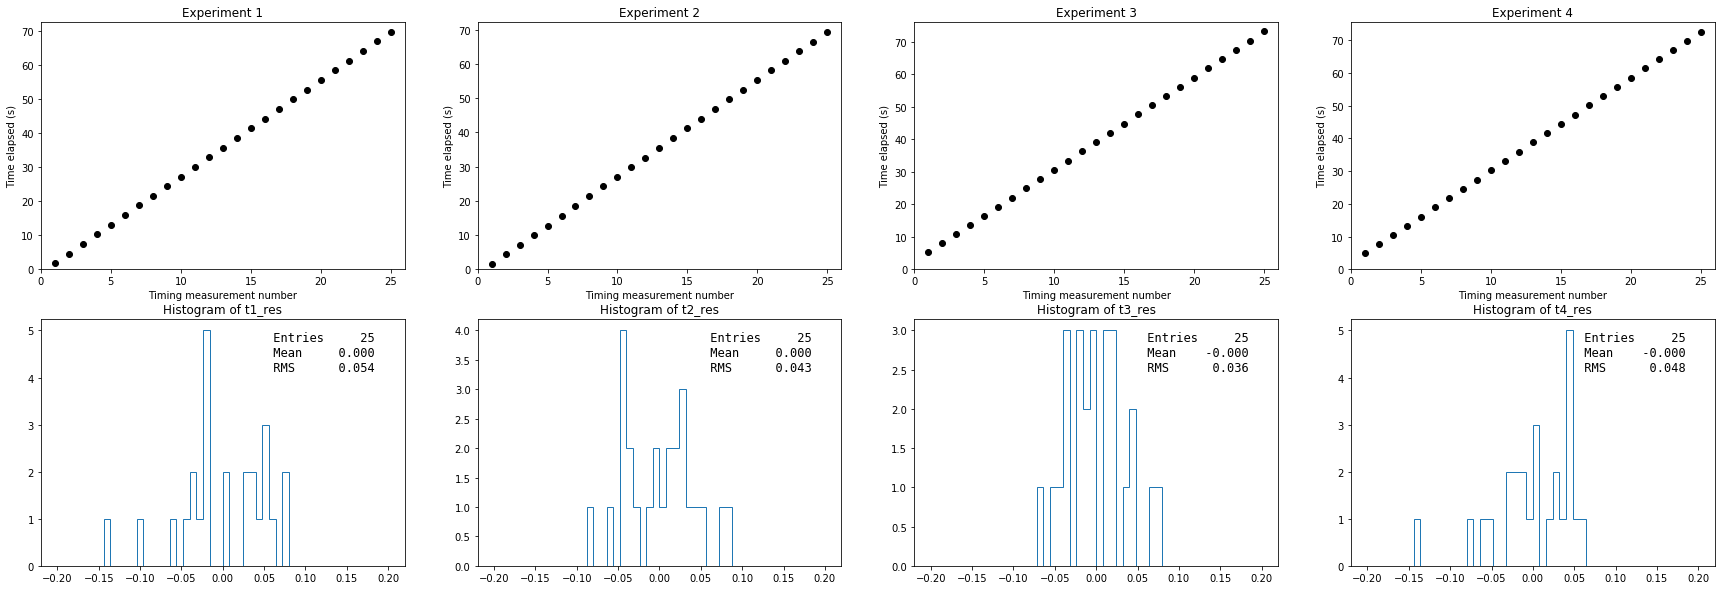

In [9]:
# Plotting raw data
sig_t = 0.05     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), sharex=False)
ax[0,0].errorbar(n1, t1, yerr=sig_t, color='k', fmt='o')
ax[0,0].set_xlabel('Timing measurement number')
ax[0,0].set_ylabel('Time elapsed (s)')
ax[0,0].set(xlim=(0, n1[-1]+np.ediff1d(n)[0]), ylim=(0, t1[-1]+np.ediff1d(t)[0]))
ax[0,0].set_title('Experiment 1')
ax[1,0].hist(t1_res, bins=50,range=(-0.2, 0.2), histtype='step')
ax[1,0].set_title('Histogram of t1_res')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(t1_res), t1_res.mean(), t1_res.std(ddof=1))
ax[1,0].text(0.62, 0.95, string, family='monospace', transform=ax[1,0].transAxes, fontsize=12, verticalalignment='top')
ax[0,1].errorbar(n2, t2, yerr=sig_t, color='k', fmt='o')
ax[0,1].set_xlabel('Timing measurement number')
ax[0,1].set_ylabel('Time elapsed (s)')
ax[0,1].set(xlim=(0, n2[-1]+np.ediff1d(n)[0]), ylim=(0, t2[-1]+np.ediff1d(t)[0]))
ax[0,1].set_title('Experiment 2')
ax[1,1].hist(t2_res, bins=50, range=(-0.2, 0.2), histtype='step')
ax[1,1].set_title('Histogram of t2_res')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(t2_res), t2_res.mean(), t2_res.std(ddof=1))
ax[1,1].text(0.62, 0.95, string, family='monospace', transform=ax[1,1].transAxes, fontsize=12, verticalalignment='top')
ax[0,2].errorbar(n3, t3, yerr=sig_t, color='k', fmt='o')
ax[0,2].set_xlabel('Timing measurement number')
ax[0,2].set_ylabel('Time elapsed (s)')
ax[0,2].set(xlim=(0, n3[-1]+np.ediff1d(n)[0]), ylim=(0, t3[-1]+np.ediff1d(t)[0]))
ax[0,2].set_title('Experiment 3')
ax[1,2].hist(t3_res, bins=50, range=(-0.2, 0.2), histtype='step')
ax[1,2].set_title('Histogram of t3_res')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(t3_res), t3_res.mean(), t3_res.std(ddof=1))
ax[1,2].text(0.62, 0.95, string, family='monospace', transform=ax[1,2].transAxes, fontsize=12, verticalalignment='top')
ax[0,3].errorbar(n4, t4, yerr=sig_t, color='k', fmt='o')
ax[0,3].set_xlabel('Timing measurement number')
ax[0,3].set_ylabel('Time elapsed (s)')
ax[0,3].set(xlim=(0, n4[-1]+np.ediff1d(n)[0]), ylim=(0, t4[-1]+np.ediff1d(t)[0]))
ax[0,3].set_title('Experiment 4')
ax[1,3].hist(t4_res, bins=50, range=(-0.2, 0.2), histtype='step')
ax[1,3].set_title('Histogram of t4_res')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(t4_res), t4_res.mean(), t4_res.std(ddof=1))
ax[1,3].text(0.62, 0.95, string, family='monospace', transform=ax[1,3].transAxes, fontsize=12, verticalalignment='top')

Text(0.62, 0.95, ' Entries    100 \n Mean     0.000 \n RMS      0.045')

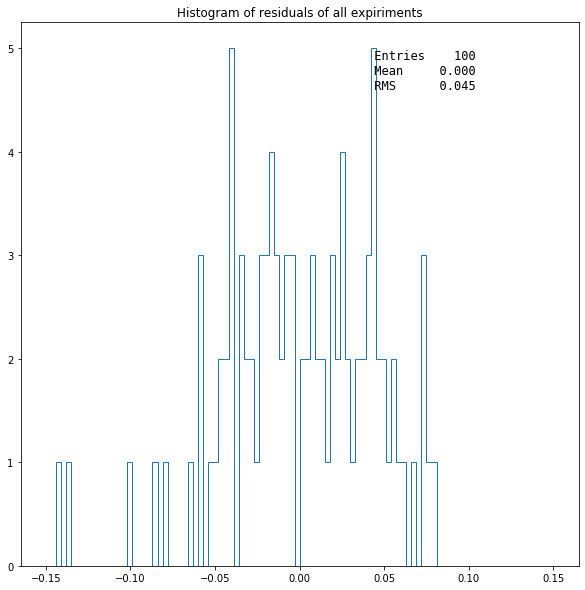

In [13]:
res_all = np.concatenate((t1_res, t2_res, t3_res, t4_res))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharex=False)
ax.hist(res_all, bins=100, range=(-0.15, 0.15), histtype='step')
ax.set_title('Histogram of residuals of all expiriments')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(res_all), res_all.mean(), res_all.std(ddof=1))
ax.text(0.62, 0.95, string, family='monospace', transform=ax.transAxes, fontsize=12, verticalalignment='top')

In [12]:
#Refit with RMS of residuals as error
RMS = res_all.std(ddof=1)
fit1 = linfit(n1, t1, fit1[0], fit1[1], t1_res.std(ddof=1))
fit2 = linfit(n2, t2, fit2[0], fit2[1], t2_res.std(ddof=1))
fit3 = linfit(n3, t3, fit3[0], fit3[1], t3_res.std(ddof=1))
fit4 = linfit(n4, t4, fit4[0], fit4[1], t4_res.std(ddof=1))
print(f"The fit of data set 1: T = {fit1[0]:.6f} +- {fit1[2]:.6f} seconds")
print(f"The fit of data set 2: T = {fit2[0]:.6f} +- {fit2[2]:.6f} seconds")
print(f"The fit of data set 3: T = {fit3[0]:.6f} +- {fit3[2]:.6f} seconds")
print(f"The fit of data set 4: T = {fit4[0]:.6f} +- {fit4[2]:.6f} seconds")


The fit of data set 1: T = 2.832715 +- 0.001487 seconds
The fit of data set 2: T = 2.825636 +- 0.001183 seconds
The fit of data set 3: T = 2.831529 +- 0.000993 seconds
The fit of data set 4: T = 2.827180 +- 0.001322 seconds


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian, and from the RMS what your (typical) uncert